In [61]:
import numpy as np
from sklearn import datasets
import math
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [71]:
data=datasets.load_wine()
X=data['data']
Y=data['target']
print(X.shape)
print(Y.shape)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=1)
print(X_train.shape)
print(data)

(178, 13)
(178,)
(142, 13)
{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [72]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train,Y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


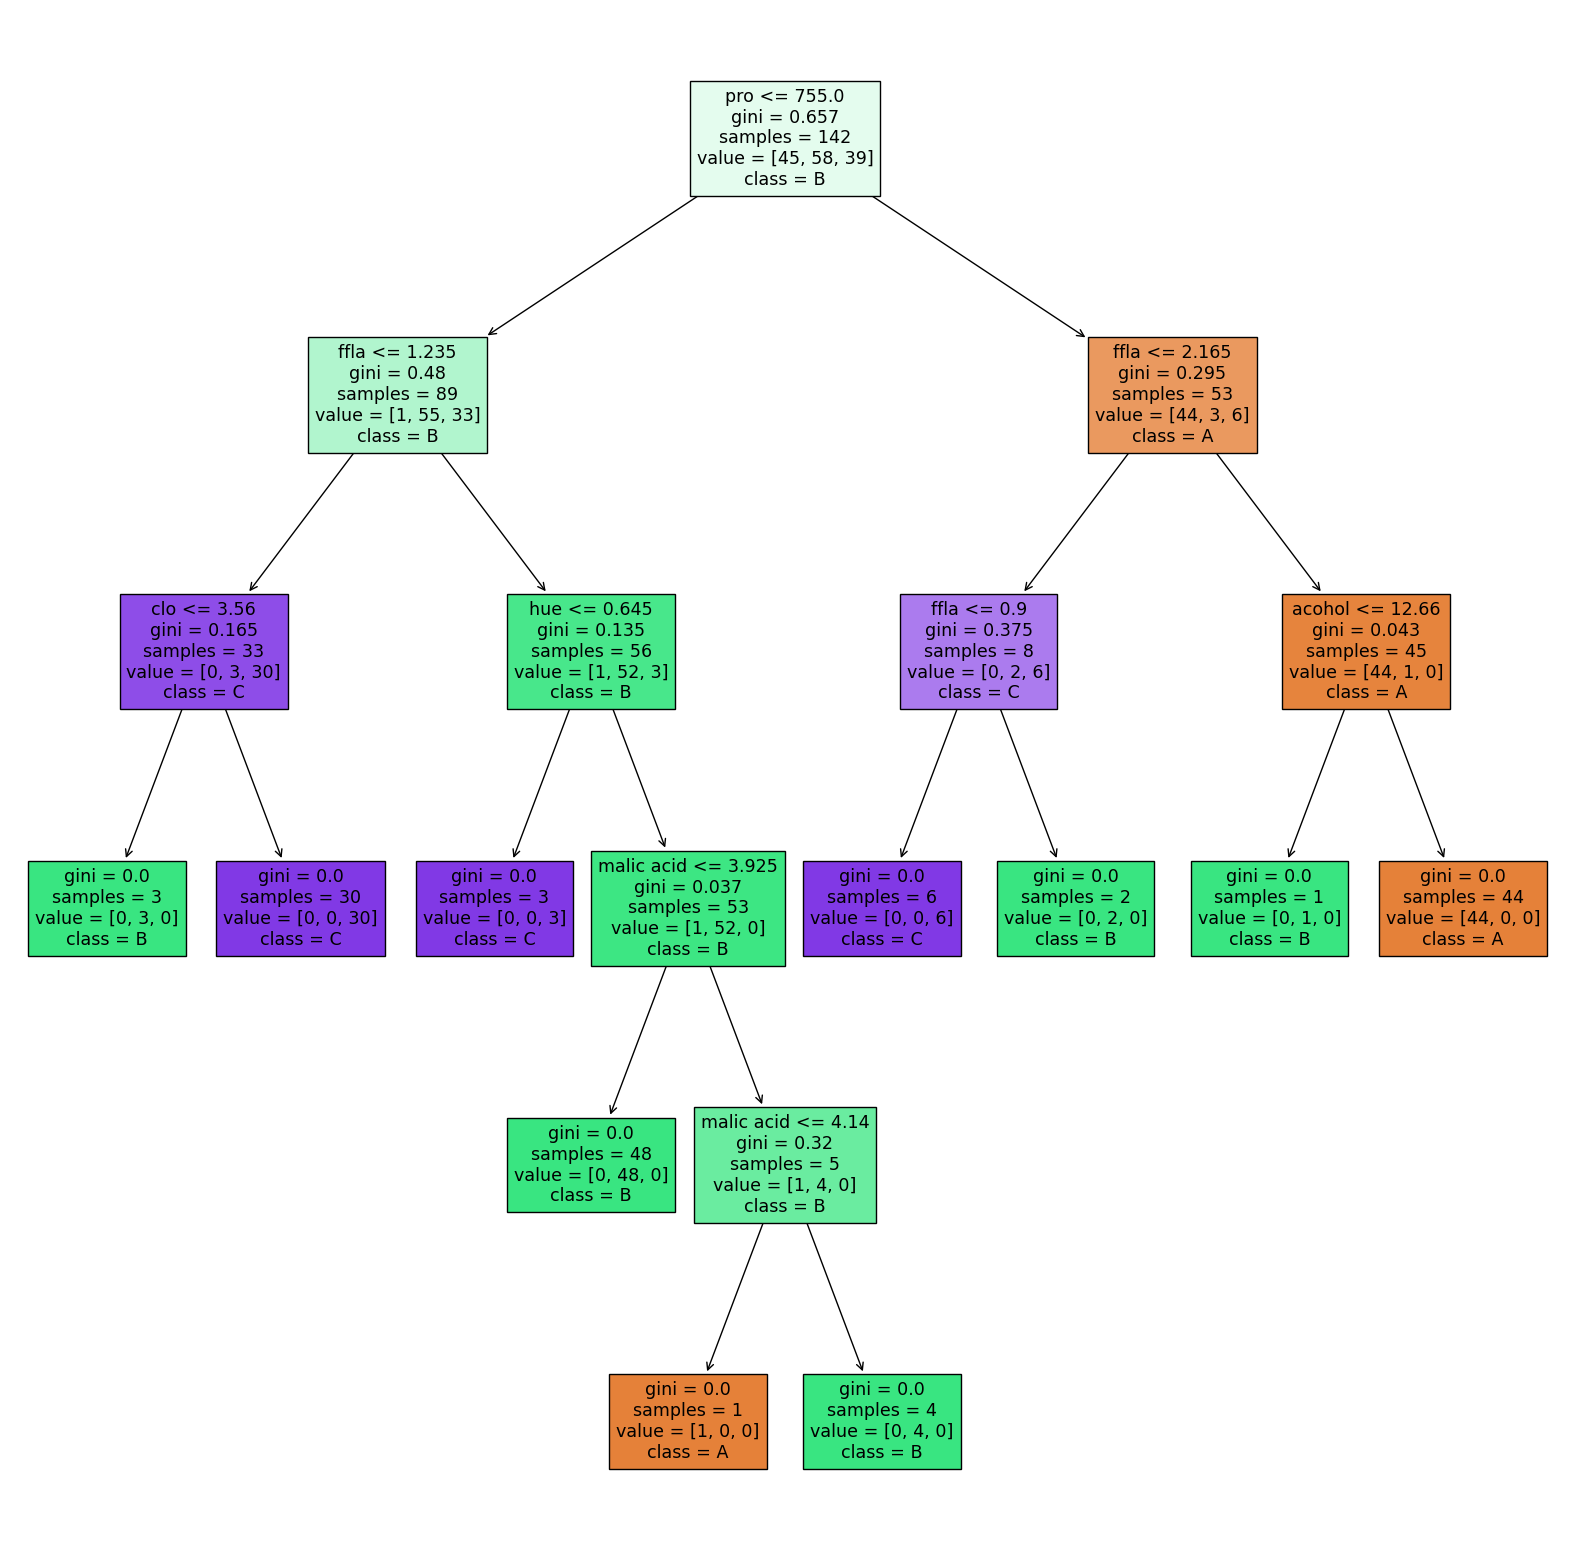

In [73]:
plt.figure(figsize=(20,20))
features = ['acohol','malic acid','ash','al of ash','mg','phenol','ffla','pnf','pr','clo','hue','od','pro']

classes = ['A','B','C']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()


In [74]:
print(f'Train score {accuracy_score(y_train_pred,Y_train)}')
print(f'Test score {accuracy_score(y_test_pred,Y_test)}')


Train score 1.0
Test score 0.9166666666666666


In [86]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [87]:
model = gcv.best_estimator_
model.fit(X_train,Y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,Y_train)}')
print(f'Test score {accuracy_score(y_test_pred,Y_test)}')

Train score 0.9929577464788732
Test score 0.9166666666666666


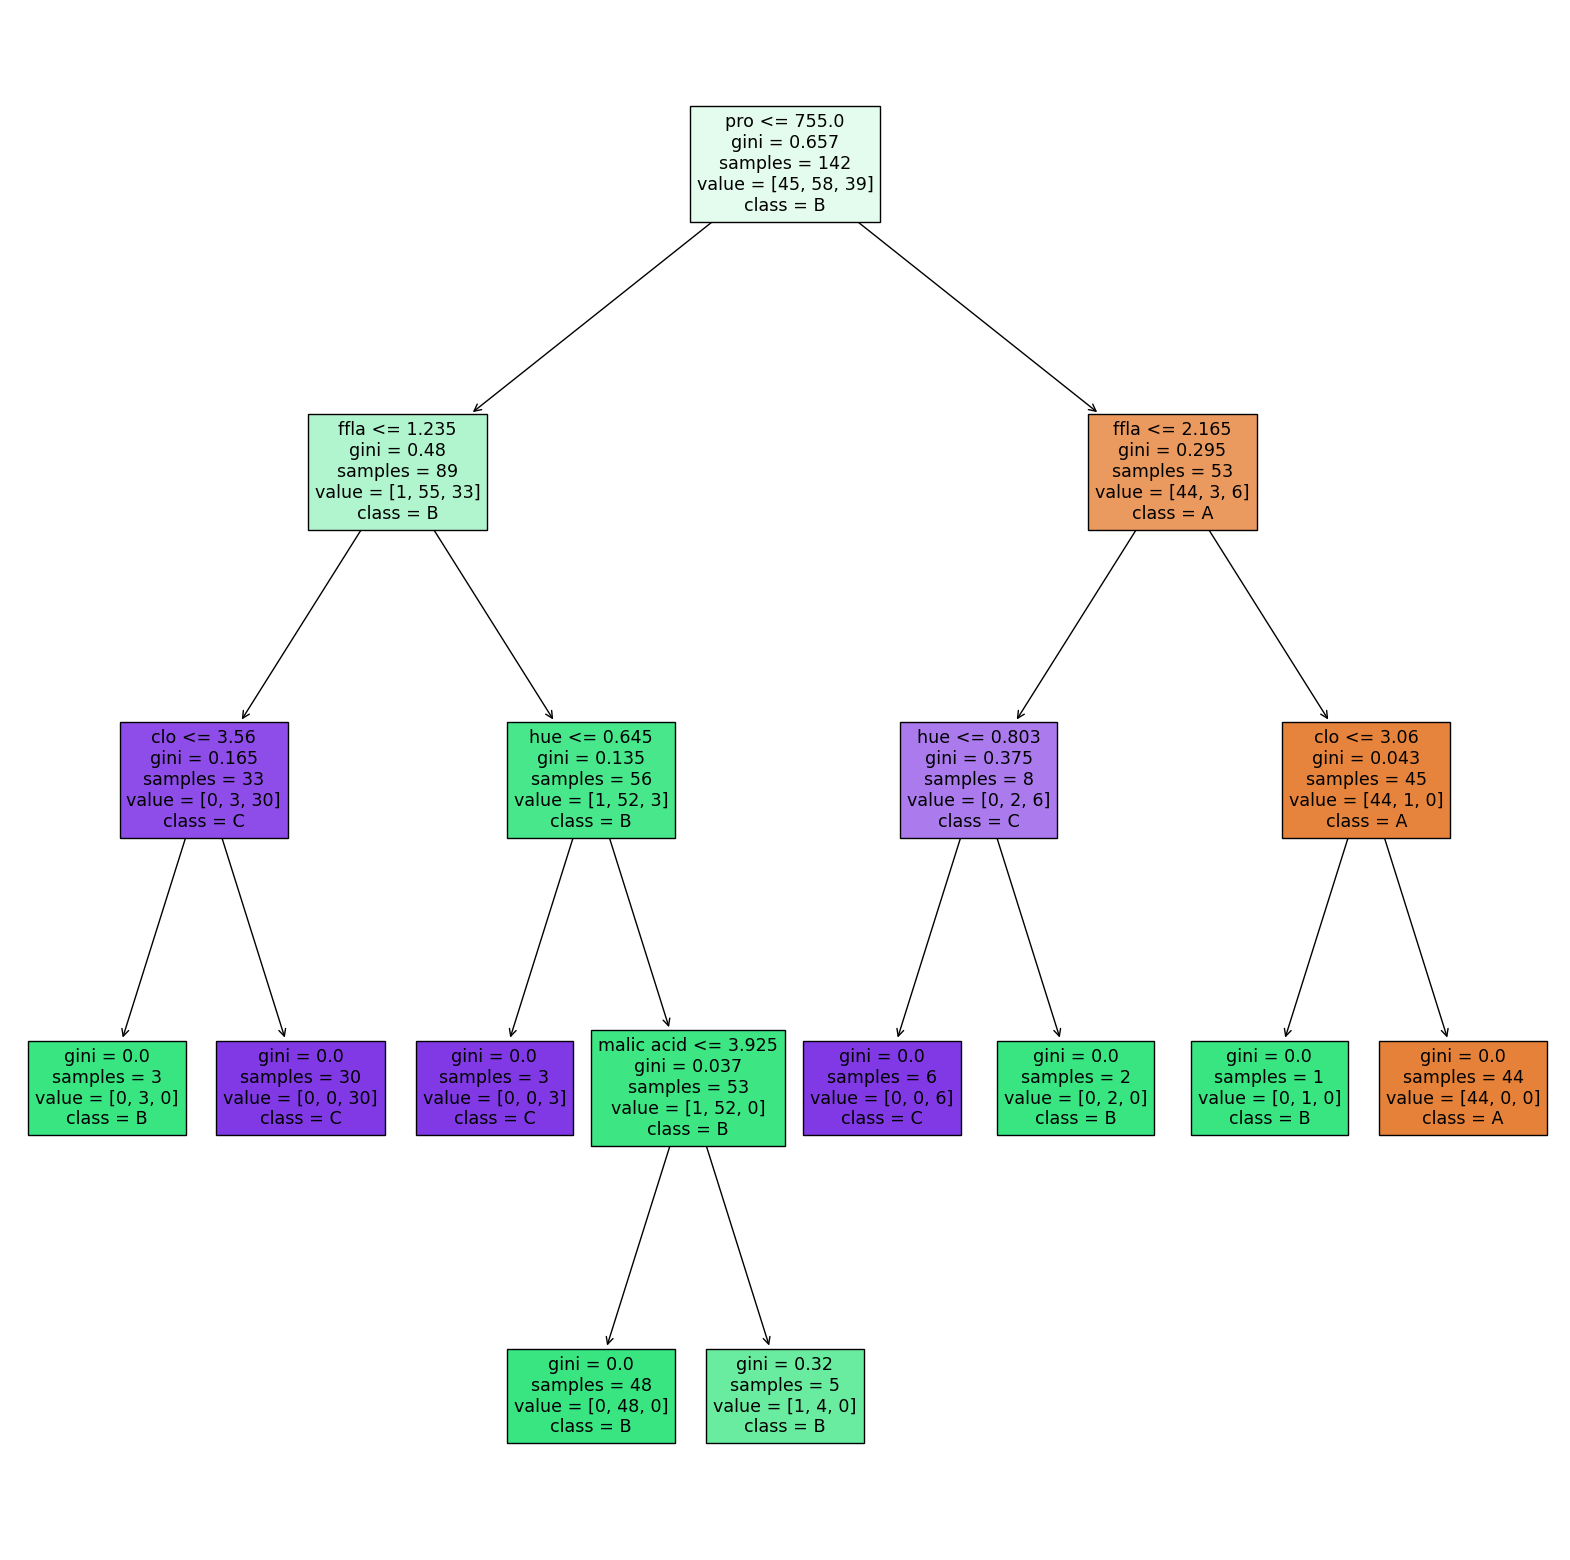

In [88]:
plt.figure(figsize=(20,20))
features = ['acohol','malic acid','ash','al of ash','mg','phenol','ffla','pnf','pr','clo','hue','od','pro']

classes = ['A','B','C']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

In [89]:
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00690938 0.01377152 0.02112676 0.03841229 0.03924965
 0.07512032 0.20967454 0.24613621]


In [91]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

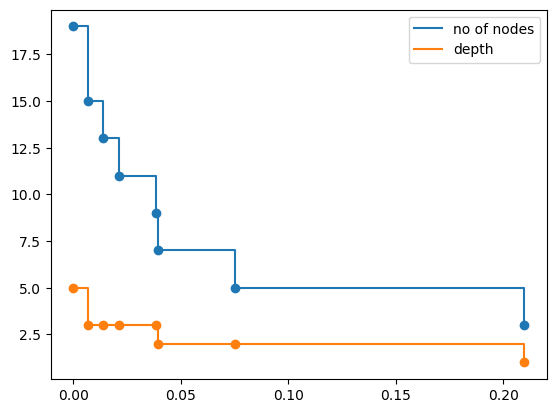

In [92]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()


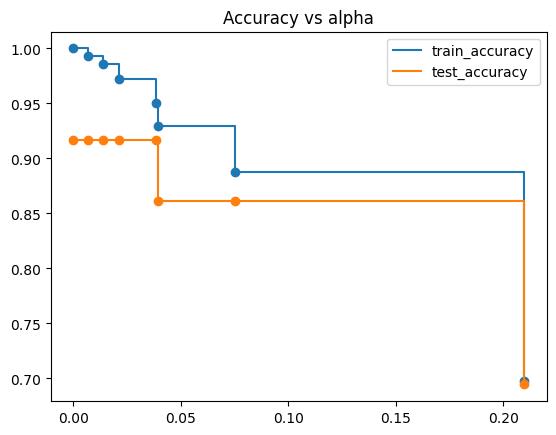

In [93]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,Y_train))
    test_acc.append(accuracy_score(y_test_pred,Y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [111]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.03)
clf_.fit(X_train,Y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,Y_train)}')
print(f'Test score {accuracy_score(y_test_pred,Y_test)}')

Train score 0.971830985915493
Test score 0.9166666666666666


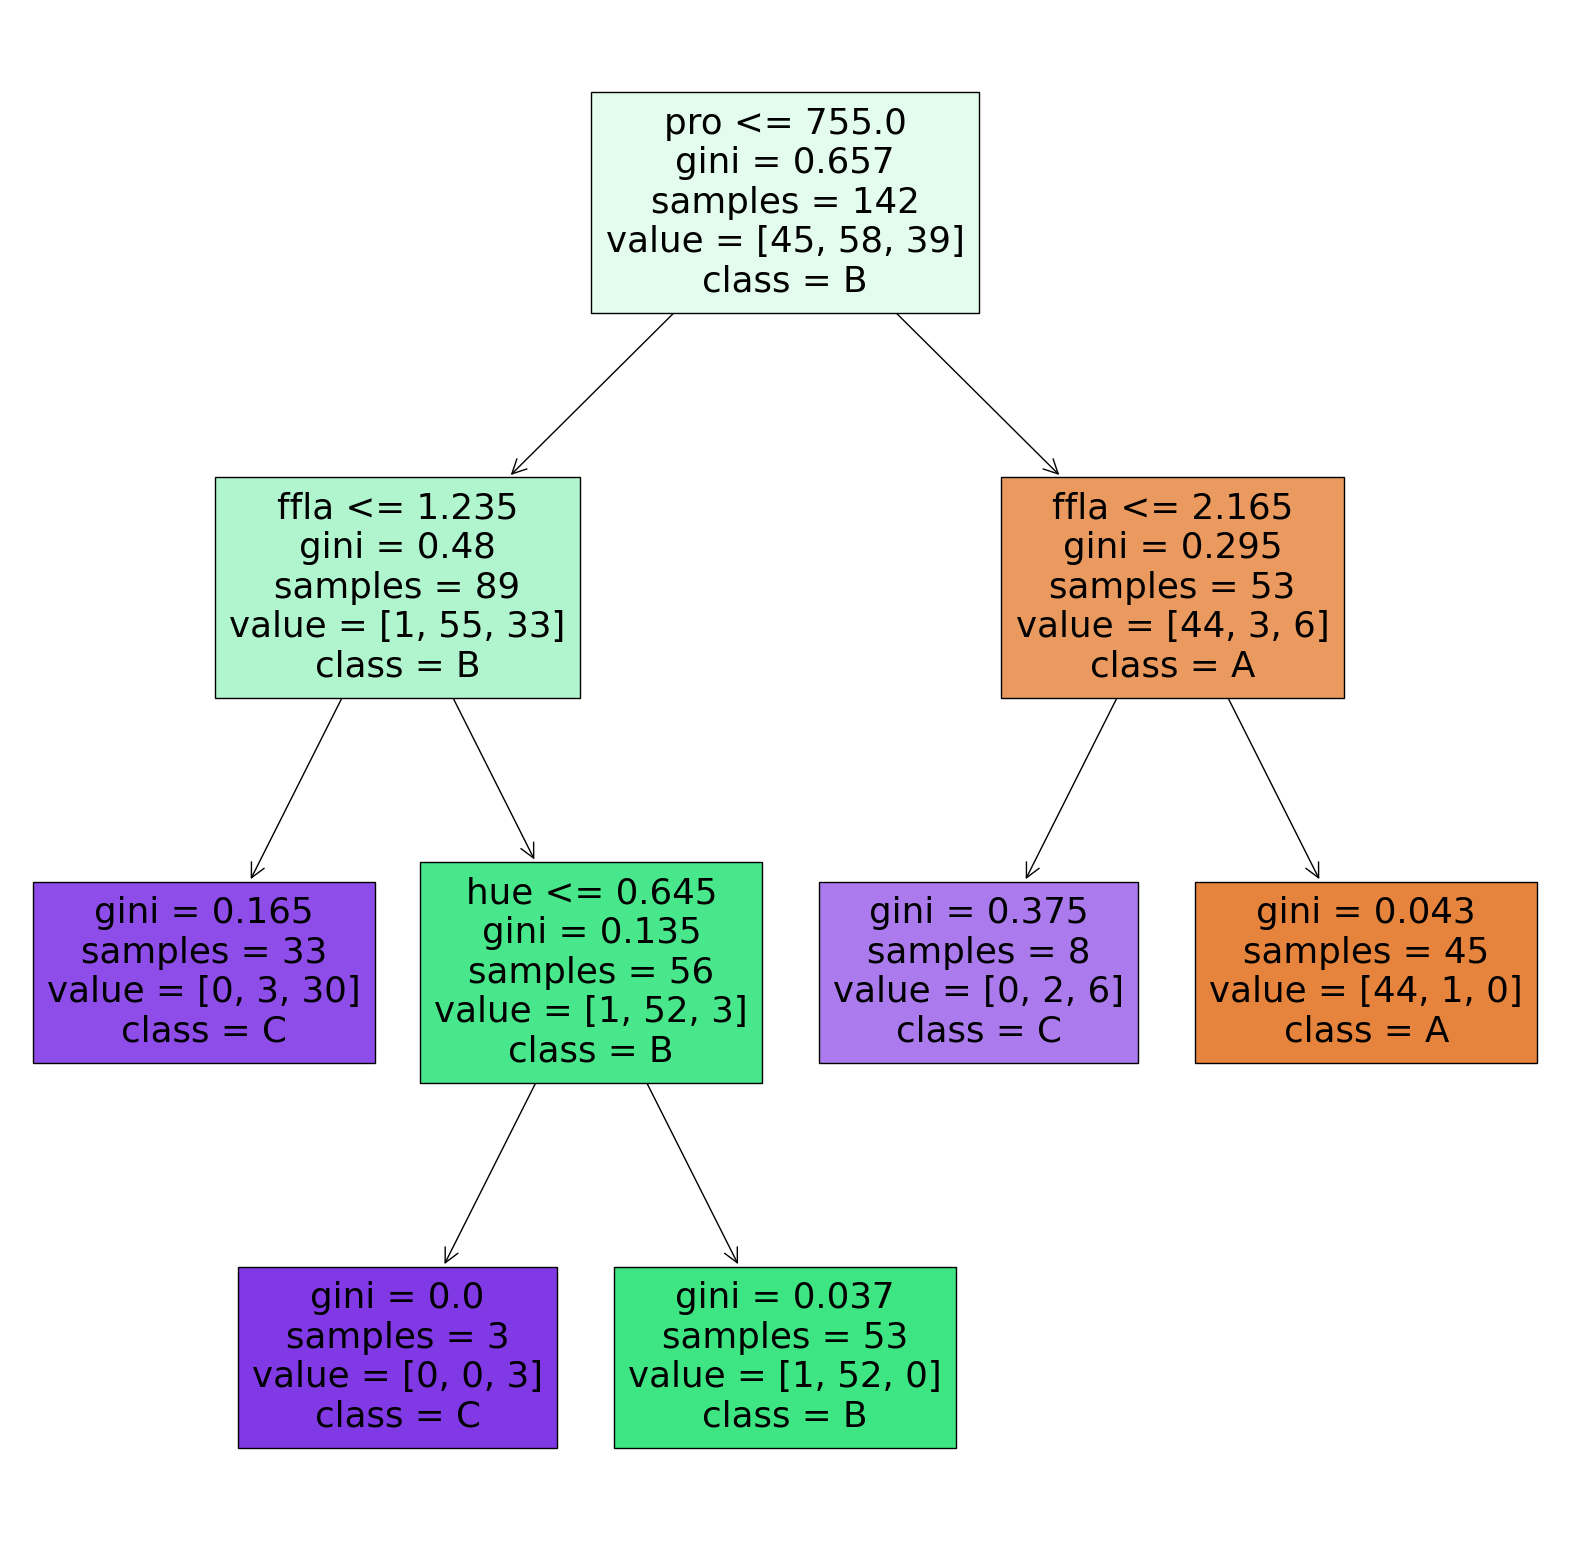

In [105]:
plt.figure(figsize=(20,20))
features = ['acohol','malic acid','ash','al of ash','mg','phenol','ffla','pnf','pr','clo','hue','od','pro']

classes = ['A','B','C']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()